### Prueba Técnica
### Diego Tapia

#### 1. Carga de Datos.

In [29]:
import json
import pandas as pd
import numpy as np

In [5]:
db_path = "evaluacion.json"
with open(db_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [6]:
type(data)

dict

In [7]:
data.keys()

dict_keys(['cliente', 'demografico', 'histRecuperacion', 'gestion'])

Tenemos cuatro bases de datos

In [9]:
df_cliente = pd.DataFrame(data['cliente'])
df_demografico = pd.DataFrame(data['demografico'])
df_hist = pd.DataFrame(data['histRecuperacion'])
df_gestion = pd.DataFrame(data['gestion'])

print("dataframes creados")


dataframes creados


#### 2. Exploración de datos


Cliente

In [10]:
df_cliente.head()

,id_cliente,valorCapitalCompra,valorCompra,diasMoraCompra
0,DNI_1,941.53,47.08,6450
1,DNI_2,884.97,96.46,1084
2,DNI_3,581.97,29.1,6334
3,DNI_4,257.76,23.2,387
4,DNI_6,1018.8,71.32,7552


In [16]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_cliente          17813 non-null  object
 1   valorCapitalCompra  17813 non-null  object
 2   valorCompra         17813 non-null  object
 3   diasMoraCompra      17813 non-null  object
dtypes: object(4)
memory usage: 556.8+ KB


Demográfico

In [11]:
df_demografico.head()

,id_cliente,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,NivelEstudio,regionCedenteInicial
0,DNI_1,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION NORTE
1,DNI_2,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaN,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR
2,DNI_3,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaN,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR
3,DNI_4,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,BACHILLERATO|SECUNDARIA,REGION SUR
4,DNI_6,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaN,FEMENINO,DIVORCIADO,BACHILLERATO|SECUNDARIA,REGION SUR


In [17]:
df_demografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_cliente            17813 non-null  object
 1   RelacionDependencia   17813 non-null  object
 2   FechaNacimiento       17813 non-null  object
 3   Nacionalidad          17813 non-null  object
 4   FechaFallecimiento    774 non-null    object
 5   Genero                17813 non-null  object
 6   EstadoCivil           17813 non-null  object
 7   NivelEstudio          17813 non-null  object
 8   regionCedenteInicial  17813 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


Histórico recuperación

In [12]:
df_hist.head()

,id_cliente,fechaAnalisis,recuperacion
0,00DNI_6372,t_2,1251.86
1,00DNI_9416,t,334.42
2,00DNI_9416,t_1,334.42
3,00DNI_9416,t_2,334.42
4,00DNI_9416,t_3,292


In [18]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_cliente     3171 non-null   object
 1   fechaAnalisis  3171 non-null   object
 2   recuperacion   3171 non-null   object
dtypes: object(3)
memory usage: 74.4+ KB


Gestión

In [13]:
df_gestion.head()

,id_DNI,canal,tipoContactoUlt6Meses,respuestaUlt6Meses,intentoGestion
0,000DNI_1,TERRENO,INDIRECTO,MENSAJE CON TERCEROS,79
1,0DNI_2,COMISIONISTA,VIRTUAL,WHATSAPP ENVIADO,227
2,00000DNI_3,TERRENO,VIRTUAL,CORREO ELECTRONICO RECIBIDO,297
3,00000DNI_4,CALL CENTER,INDIRECTO,MENSAJE CON TERCEROS,107
4,00DNI_6,TERRENO,VIRTUAL,CORREO ELECTRONICO RECIBIDO,209


In [19]:
df_gestion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_DNI                 17813 non-null  object
 1   canal                  17813 non-null  object
 2   tipoContactoUlt6Meses  17813 non-null  object
 3   respuestaUlt6Meses     17813 non-null  object
 4   intentoGestion         17813 non-null  object
dtypes: object(5)
memory usage: 695.9+ KB


## Ejercicio 1:

Supongamos que se encuentra trabajando con el área de recuperaciones de
cartera, esta área compra en el sistema financiero carteras que llevan mucho tiempo de
castigo. Acumulando un stock importante en los últimos años y la recuperación está cayendo
que haría desde el punto de vista analítico para: ¿mejorar la recuperación?, ¿para que sea más
efectiva? Justifique su respuesta. (1 punto) Mencione qué estrategia, indicadores, modelos o
segmentaciones aplicaría y cómo mediría el impacto.


Antes de definir una estrategia analítica, se realizaría un Análisis Exploratorio de Datos (EDA) con el objetivo de comprender la información disponible, su calidad y las variables relevantes para la segmentación de la cartera castigada.

A partir del EDA, se analizarían variables demográficas (edad, género, estado civil, relación de dependencia), económicas (valor del capital adeudado, días de mora) y comportamentales (histórico de recuperación, canal y tipo de gestión). Para las variables numéricas se obtendrían estadísticas descriptivas como media y distribución, mientras que las variables categóricas serían transformadas mediante técnicas como one-hot encoding para facilitar el análisis conjunto.

Con esta información, se evaluaría la relación entre variables mediante análisis estadístico y de correlación, permitiendo identificar los factores más relevantes para la segmentación de clientes. A partir de ello, se propone una segmentación inicial basada principalmente en edad y relación de dependencia, pudiendo refinarse según los resultados del análisis:

Jóvenes (18–24 años), dependientes

Jóvenes (18–24 años), independientes

Adultos jóvenes (25–45 años), dependientes

Adultos jóvenes (25–45 años), independientes

Adultos mayores (>45 años), dependientes

Adultos mayores (>45 años), independientes

Dependiendo de los resultados del análisis estadístico, algunos segmentos podrían fusionarse u omitirse si no presentan diferencias significativas en su comportamiento de recuperación.

Estrategia por segmento

Jóvenes: priorizar canales digitales como WhatsApp, con mensajes claros sobre opciones de pago, beneficios por pronto pago y posibilidad de contacto con un agente para planes personalizados.

Adultos jóvenes: comunicación vía correo electrónico con información comparativa de intereses, descuentos y opciones de refinanciamiento.

Adultos mayores: estrategias más conservadoras, como reducción de intereses, mayor número de cuotas, períodos de gracia y seguimiento más cercano.

Medición y seguimiento

El desempeño de cada estrategia se mediría por segmento utilizando indicadores como tasa de recuperación y monto recuperado. Con el histórico de recuperación disponible (por ejemplo, cinco períodos), se podría realizar una proyección a corto plazo (tres meses) para evaluar si la estrategia es efectiva o requiere ajustes.

Modelado

Inicialmente, se podría utilizar un modelo de regresión simple para proyectar montos de recuperación. A futuro, con mayor información histórica, se podría implementar un modelo supervisado (por ejemplo, Random Forest) para estimar la probabilidad de recuperación por cliente y priorizar esfuerzos de cobranza.

---

### Ejercicio 2

Ejercicio 2: Se le ha proporcionado 3 bases de datos. (Cliente) donde se encuentra la
información de una compra de cartera, (demográfico) donde están datos demográficos del
cliente y, (histórico de pagos) donde está el historio de pagos de los últimos 6 meses de los
clientes t_5 indica el mes más alejado y t el mes más cercano. Realice lo siguiente:
Consolide la información de la base clientes y demográficos en una sola. ¿Cuántos clientes son
independientes? (0.5 puntos).

- ¿En qué región se encuentra la concentración de capital comprado? (0.5 puntos)
- Realice un gráfico con las edades de los clientes. ¿Qué puede concluir? (1 punto)
- Utilizando la base históricoRecuperacion, consolide la base anterior con el histórico de pagos ¿qué porcentaje de clientes ha recuperado en los últimos 6 meses más de 200 dólares? (2 puntos)

*Hint*: la base histórica de pagos pivotearla antes de unirla, adicionalmente tomar en cuenta que la longitud del cliente id es de 10 dígitos.

#### Limpieza Bases Cliente y Demografico

Cliente.
Convertimos las variables a tipo numéricas, a excepción de id_cliente



In [25]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_cliente          17813 non-null  object
 1   valorCapitalCompra  17813 non-null  object
 2   valorCompra         17813 non-null  object
 3   diasMoraCompra      17813 non-null  object
dtypes: object(4)
memory usage: 556.8+ KB


In [26]:
num_cols_cliente = ["valorCapitalCompra", "valorCompra", "diasMoraCompra"]

for c in num_cols_cliente:
    if c in df_cliente.columns:
        df_cliente[c] = pd.to_numeric(df_cliente[c], errors="coerce")

print("variables convertidas a numéricas")


variables convertidas a numéricas


In [27]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cliente          17813 non-null  object 
 1   valorCapitalCompra  17813 non-null  float64
 2   valorCompra         17813 non-null  float64
 3   diasMoraCompra      17813 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 556.8+ KB


No se encuentran valores nulos en la base Clientes.


Demográfico.




In [28]:
df_demografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_cliente            17813 non-null  object
 1   RelacionDependencia   17813 non-null  object
 2   FechaNacimiento       17813 non-null  object
 3   Nacionalidad          17813 non-null  object
 4   FechaFallecimiento    774 non-null    object
 5   Genero                17813 non-null  object
 6   EstadoCivil           17813 non-null  object
 7   NivelEstudio          17813 non-null  object
 8   regionCedenteInicial  17813 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


Convertimos las variables de tipo fecha a Date

In [30]:
for c in ["FechaNacimiento", "FechaFallecimiento"]:
    if c in df_demografico.columns:
        # reemplazamos "NaN" o "nan" por np.nan en caso de que vengan como texto
        df_demografico[c] = df_demografico[c].replace(["NaN", "nan",""], np.nan)
        df_demografico[c] = pd.to_datetime(df_demografico[c], errors="coerce")


In [31]:
df_demografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17813 entries, 0 to 17812
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_cliente            17813 non-null  object        
 1   RelacionDependencia   17813 non-null  object        
 2   FechaNacimiento       17813 non-null  datetime64[ns]
 3   Nacionalidad          17813 non-null  object        
 4   FechaFallecimiento    774 non-null    datetime64[ns]
 5   Genero                17813 non-null  object        
 6   EstadoCivil           17813 non-null  object        
 7   NivelEstudio          17813 non-null  object        
 8   regionCedenteInicial  17813 non-null  object        
dtypes: datetime64[ns](2), object(7)
memory usage: 1.2+ MB


Creamos el campo **Edad**, nos servirá más adelante ya sea para segmentation o gráficos. Para los clientes fallecidos se calculó la edad al momento del fallecimiento.


In [40]:
if "FechaNacimiento" in df_demografico.columns:
    today = pd.Timestamp.today().normalize()

    df_demografico["Edad"] = np.where(
        df_demografico["FechaFallecimiento"].notna(),
        (df_demografico["FechaFallecimiento"] - df_demografico["FechaNacimiento"]).dt.days // 365,
        (today - df_demografico["FechaNacimiento"]).dt.days // 365
    )

    df_demografico["Edad"] = df_demografico["Edad"].astype("Int64")


print("Agregado el campo edad.")

df_demografico.head()

Agregado el campo edad.


,id_cliente,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,NivelEstudio,regionCedenteInicial,Edad
0,DNI_1,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION NORTE,76
1,DNI_2,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,80
2,DNI_3,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,91
3,DNI_4,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,BACHILLERATO|SECUNDARIA,REGION SUR,85
4,DNI_6,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,BACHILLERATO|SECUNDARIA,REGION SUR,75


La variable FechaFallecimiento presenta un alto porcentaje de valores nulos, lo cual es esperado al representar clientes vivos. Se creó una variable binaria fallecido para facilitar su uso en análisis y modelado.

In [41]:
df_demografico["Fallecido"] = df_demografico["FechaFallecimiento"].notna().astype(int)
print("Agregado el campo Fallecido.")
df_demografico.head()

Agregado el campo Fallecido.


,id_cliente,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,NivelEstudio,regionCedenteInicial,Edad,Fallecido
0,DNI_1,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION NORTE,76,1
1,DNI_2,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,80,0
2,DNI_3,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,91,0
3,DNI_4,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,BACHILLERATO|SECUNDARIA,REGION SUR,85,1
4,DNI_6,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,BACHILLERATO|SECUNDARIA,REGION SUR,75,0


Antes de consolidar Cliente y Demografico se valida que no haya valores duplicados.

In [42]:
df_cliente["id_cliente"].duplicated().sum()
df_demografico["id_cliente"].duplicated().sum()


np.int64(0)

No se registran duplicados. El siguiente paso normalizar el campo id_cliente, substrayendo espacios o ceros iniciales asegurando una correcta unión entre las bases.

In [47]:
import re
def normalize_dni(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    s = re.sub(r"\s+", "", s)    # quita espacios
    s = re.sub(r"^0+", "", s)    # quita ceros iniciales
    return s

df_cliente["id_cliente"] = df_cliente["id_cliente"].apply(normalize_dni)
df_demografico["id_cliente"] = df_demografico["id_cliente"].apply(normalize_dni)


Se procede con la consolidación (join) de las bases Cliente y demográfico

In [48]:
cliente_demo = df_cliente.merge(
    df_demografico,
    on="id_cliente",
    how="left",
    suffixes=("", "_demo")
)


Se tiene el mismo numero de registros.

In [49]:
cliente_demo.shape

(17813, 14)

Se valida que no hay registros duplicados.

In [51]:
cliente_demo["id_cliente"].duplicated().sum()


np.int64(0)

BASE CLIENTE_DEMO:


In [52]:
cliente_demo.head()

,id_cliente,valorCapitalCompra,valorCompra,diasMoraCompra,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,NivelEstudio,regionCedenteInicial,Edad,Fallecido
0,DNI_1,941.53,47.08,6450,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION NORTE,76,1
1,DNI_2,884.97,96.46,1084,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,80,0
2,DNI_3,581.97,29.10,6334,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,91,0
3,DNI_4,257.76,23.20,387,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,BACHILLERATO|SECUNDARIA,REGION SUR,85,1
4,DNI_6,1018.80,71.32,7552,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,BACHILLERATO|SECUNDARIA,REGION SUR,75,0


**Consolide la información de la base clientes y demográficos en una sola. ¿Cuántos clientes son
independientes?**



In [55]:
cliente_demo["RelacionDependencia"].value_counts(dropna=False)


RelacionDependencia
INDEPENDIENTE      9151
DEPENDIENTE        5268
NO ESPECIFICADO    3394
Name: count, dtype: int64

A partir de la tabla consolidada de cliente y demográfico, se identificaron **9151** clientes independientes, lo que representa aproximadamente **51.37%** del total de clientes analizados.

**¿En qué región se encuentra la concentración de capital comprado?**

In [57]:
capital_por_region = (
    cliente_demo
    .groupby("regionCedenteInicial", dropna=False)["valorCapitalCompra"]
    .sum()
    .sort_values(ascending=False)
)

capital_por_region


regionCedenteInicial
REGION CENTRO    33669596.05
REGION COSTA     26330090.68
REGION NORTE      9149145.11
REGION SUR        3852903.26
Name: valorCapitalCompra, dtype: float64

In [60]:
region_top = capital_por_region.idxmax()
capital_top = capital_por_region.max()

region_top, capital_top


('REGION CENTRO', np.float64(33669596.05))

In [61]:
capital_total = cliente_demo["valorCapitalCompra"].sum()
porcentaje_top = capital_top / capital_total * 100

round(porcentaje_top, 2)


np.float64(46.12)

Al agrupar el capital comprado por región, se observa que la **REGIÓN CENTRO** concentra el mayor monto de capital, con un total de **33669596.05** lo que representa el 46.12% del capital total. Esto indica que dicha región debería ser priorizada en la definición de estrategias de cobranza dado su alto impacto potencial en la recuperación.

**Realice un gráfico con las edades de los clientes. ¿Qué puede concluir?**

Se usa el campo "Edad" creado anteriormente.

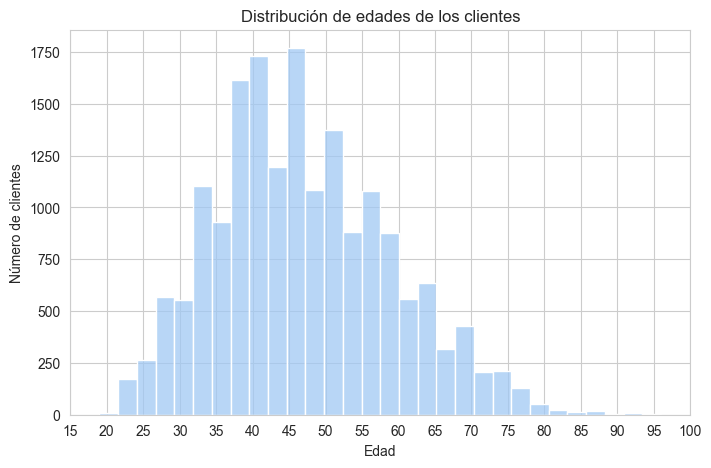

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

edades = cliente_demo["Edad"].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(edades, bins=30, kde=False)

plt.xlabel("Edad")
plt.ylabel("Número de clientes")
plt.title("Distribución de edades de los clientes")

xmin = int(np.floor(edades.min() / 5) * 5)
xmax = int(np.ceil(edades.max() / 5) * 5)
plt.xticks(np.arange(xmin, xmax + 1, 5))

plt.show()


Se observa una concentración significativa de clientes en el rango de 33 a 60 años, correspondiente a población adulta activa. Este hallazgo sugiere que las estrategias de cobranza deberían priorizar canales formales y propuestas de pago estructuradas, alineadas con la capacidad y estabilidad económica de este segmento.

**Utilizando la base históricoRecuperacion, consolide la base anterior con el histórico de
pagos ¿qué porcentaje de clientes ha recuperado en los últimos 6 meses más de 200
dólares?**

Se pivota df_hist Histórico recuperación

In [69]:
df_hist_pivot = (
    df_hist
    .pivot_table(
        index="id_cliente",
        columns="fechaAnalisis",
        values="recuperacion",
        aggfunc="sum"
    )
    .reset_index()
)

# Renombrar columnas
df_hist_pivot.columns = ["id_cliente"] + [f"rec_{c}" for c in df_hist_pivot.columns[1:]]


In [70]:
df_hist_pivot.head()

,id_cliente,rec_t,rec_t_1,rec_t_2,rec_t_3,rec_t_4,rec_t_5
0,0000DNI_16,NaN,NaN,NaN,NaN,NaN,60
1,0000DNI_37,NaN,280,170,265,265,275
2,0000DNI_49,NaN,NaN,NaN,2.06,NaN,NaN
3,0000DNI_78,126.4,63,126.38,NaN,NaN,63.2
4,0000DNI_81,250,NaN,NaN,NaN,NaN,NaN


Se normaliza a 10 digitos el id_cliente de la tabla consolidada cliente_demo (Cliente - Demografico)

In [74]:
def normalize_id_10(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    s = s.replace(" ", "")
    s = s.lstrip("0")          # quita ceros a la izquierda
    return s.zfill(10)         # rellena hasta 10 caracteres


In [75]:
cliente_demo["id_cliente"] = cliente_demo["id_cliente"].apply(normalize_id_10)

In [76]:
cliente_demo.head()

,id_cliente,valorCapitalCompra,valorCompra,diasMoraCompra,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,NivelEstudio,regionCedenteInicial,Edad,Fallecido
0,00000DNI_1,941.53,47.08,6450,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION NORTE,76,1
1,00000DNI_2,884.97,96.46,1084,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,80,0
2,00000DNI_3,581.97,29.10,6334,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,BASICA|INICIAL|PRIMARIA|ELEMENTAL,REGION SUR,91,0
3,00000DNI_4,257.76,23.20,387,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,BACHILLERATO|SECUNDARIA,REGION SUR,85,1
4,00000DNI_6,1018.80,71.32,7552,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,BACHILLERATO|SECUNDARIA,REGION SUR,75,0


In [77]:
cliente_demo["id_cliente"].str.len().value_counts()

id_cliente
10    17813
Name: count, dtype: int64

Se convierte las variables de historico de pagos a tipo numéricas.

In [73]:
df_hist_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  890 non-null    object
 1   rec_t       544 non-null    object
 2   rec_t_1     565 non-null    object
 3   rec_t_2     561 non-null    object
 4   rec_t_3     541 non-null    object
 5   rec_t_4     471 non-null    object
 6   rec_t_5     489 non-null    object
dtypes: object(7)
memory usage: 48.8+ KB


In [78]:
cols_rec = [c for c in df_hist_pivot.columns if c.startswith("rec_")]
cols_rec


['rec_t', 'rec_t_1', 'rec_t_2', 'rec_t_3', 'rec_t_4', 'rec_t_5']

In [79]:
df_hist_pivot[cols_rec] = df_hist_pivot[cols_rec].apply(
    pd.to_numeric, errors="coerce"
)
print("Variables convertidas")

Variables convertidas


In [81]:
df_hist_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  890 non-null    object 
 1   rec_t       544 non-null    float64
 2   rec_t_1     565 non-null    float64
 3   rec_t_2     561 non-null    float64
 4   rec_t_3     541 non-null    float64
 5   rec_t_4     471 non-null    float64
 6   rec_t_5     489 non-null    float64
dtypes: float64(6), object(1)
memory usage: 48.8+ KB


In [88]:
df_hist_pivot.head()

,id_cliente,rec_t,rec_t_1,rec_t_2,rec_t_3,rec_t_4,rec_t_5
0,0000DNI_16,NaN,NaN,NaN,NaN,NaN,60.0
1,0000DNI_37,NaN,280.0,170.00,265.00,265.0,275.0
2,0000DNI_49,NaN,NaN,NaN,2.06,NaN,NaN
3,0000DNI_78,126.4,63.0,126.38,NaN,NaN,63.2
4,0000DNI_81,250.0,NaN,NaN,NaN,NaN,NaN


Se fusiona las Bases cliente demográfico e histórico

In [82]:
cliente_demo_hist = cliente_demo.merge(
    df_hist_pivot,
    on="id_cliente",
    how="left"
)
print("base consolidada Cliente Demografico Historico")

base consolidada Cliente Demografico Historico


Al ver las dimensiones (shape) de la base se confirma que se agregaron 6 columnas mas a las 14 de Cliente_demo, se valida la correcta fusion de las bases

In [84]:
cliente_demo_hist.shape


(17813, 20)

Se valida que se tiene los 890 clientes con registros en la base histórico de pagos, un 5% del total de clientes.

In [90]:
cols_rec = [c for c in cliente_demo_hist.columns if c.startswith("rec_")]

clientes_con_hist = (cliente_demo_hist[cols_rec].notna().any(axis=1)).sum()
total = cliente_demo_hist.shape[0]

clientes_con_hist, total, round(clientes_con_hist/total * 100, 2)


(np.int64(890), 17813, np.float64(5.0))

Se agrega una columna, llamada recuperacion_6m

In [98]:
cliente_demo_hist["recuperacion_6m"] = cliente_demo_hist[cols_rec].sum(axis=1)



In [99]:
cliente_demo_hist.head()

,id_cliente,valorCapitalCompra,valorCompra,diasMoraCompra,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,...,regionCedenteInicial,Edad,Fallecido,rec_t,rec_t_1,rec_t_2,rec_t_3,rec_t_4,rec_t_5,recuperacion_6m
0,00000DNI_1,941.53,47.08,6450,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,...,REGION NORTE,76,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,00000DNI_2,884.97,96.46,1084,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,...,REGION SUR,80,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,00000DNI_3,581.97,29.10,6334,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,...,REGION SUR,91,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,00000DNI_4,257.76,23.20,387,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,...,REGION SUR,85,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,00000DNI_6,1018.80,71.32,7552,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,...,REGION SUR,75,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Se cuentan los clientes con más de $200 de recuperación

In [100]:
clientes_mas_200 = (
    cliente_demo_hist[cliente_demo_hist["recuperacion_6m"] > 200]
    ["id_cliente"]
    .nunique()
)
print("contar clientes con mas de $200 ")

contar clientes con mas de $200 


In [102]:
total_clientes = cliente_demo_hist["id_cliente"].nunique()

porcentaje = clientes_mas_200 / total_clientes * 100

clientes_mas_200, round(porcentaje, 2)


(655, 3.68)

Del total de clientes analizados, 655 que representan el **3.68 %** han recuperado más de 200 dólares en los últimos seis meses.


---
### Ejercicio 3:

Implemente un modelo que permita medir la probabilidad de recuperación del
cliente. Considere como variable dependiente a todos los clientes cuya recuperación sea
mayor a 250 dólares en su histórico. Justifique su metodología. (5 puntos)

Definimos la variable dependiente

In [103]:
cliente_demo_hist["target_recupera_250"] = (
    cliente_demo_hist["recuperacion_6m"] > 250
).astype(int)

cliente_demo_hist["target_recupera_250"].value_counts(normalize=True)


target_recupera_250
0    0.966204
1    0.033796
Name: proportion, dtype: float64

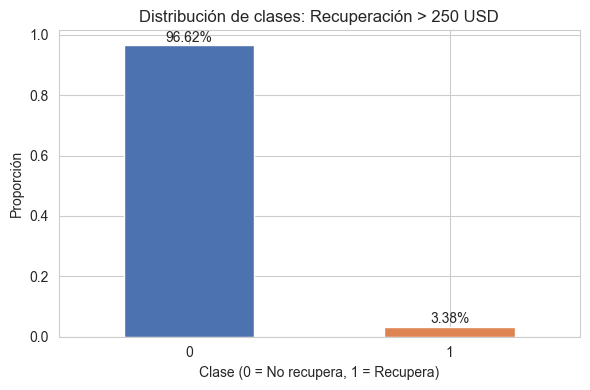

In [118]:

class_dist = cliente_demo_hist["target_recupera_250"].value_counts(normalize=True)

colors = ["#4C72B0", "#DD8452"]  # azul para 0, naranja para 1

plt.figure(figsize=(6,4))
class_dist.plot(kind="bar", color=colors)

plt.title("Distribución de clases: Recuperación > 250 USD")
plt.xlabel("Clase (0 = No recupera, 1 = Recupera)")
plt.ylabel("Proporción")
plt.xticks(rotation=0)


for i, v in enumerate(class_dist.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()



Estamos frente a un dataset desbalanceado como se esperaba de acuerdo a los porcentajes de recuperación obtenidos anteriormente.

Como variables independientes se ha seleccionado:

Numéricas

- edad
- valorCapitalCompra
- valorCompra
- diasMoraCompra
- intentoGestion

Categóricas

- RelacionDependencia
- Genero
- EstadoCivil
- regionCedenteInicial
- canal
- tipoContactoUlt6Meses


Se ha excluido IDs y fechas



Preprocesamiento


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [106]:
X = cliente_demo_hist[[
    "Edad", "valorCapitalCompra", "valorCompra", "diasMoraCompra",
    "RelacionDependencia", "Genero", "EstadoCivil",
    "regionCedenteInicial"
]]

y = cliente_demo_hist["target_recupera_250"]

print("Variables independietes (X) y variable dependiente (Y)  creadas")

Variables independietes (X) y variable dependiente (Y)  creadas


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Division de conjuntos de entrenamiento y prueba")

Division de conjuntos de entrenamiento y prueba


Modelo seleccionado: Regresión Logística.

Pipeline

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

num_features = ["Edad", "valorCapitalCompra", "valorCompra", "diasMoraCompra"]
cat_features = ["RelacionDependencia", "Genero", "EstadoCivil", "regionCedenteInicial"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=2000, class_weight="balanced"))
    # Se tiene un dataset desbalanceado por eso se usó class_weight="balanced"
    # para que el modelo pueda predecir la clase minoritaria (1)
])

model.fit(X_train, y_train)

print("modelo entrenado")


modelo entrenado


Evaluación

In [114]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

roc_auc


0.77181560679848

Interpretación metrica ROC_AUC:

El modelo obtuvo un valor de ROC-AUC de 0.77, lo que indica una buena capacidad discriminatoria entre clientes con alta y baja probabilidad de recuperación. Dado el fuerte desbalance del conjunto de datos, esta métrica resulta más adecuada que la exactitud y válida el uso del modelo como herramienta de priorización para estrategias de cobranza

In [115]:
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.65      0.78      5163
           1       0.07      0.80      0.14       181

    accuracy                           0.65      5344
   macro avg       0.53      0.72      0.46      5344
weighted avg       0.96      0.65      0.76      5344



Interpretacion metricas clasicas (Acc, presicion, recall ):

El modelo logra identificar 80% de los clientes que sí recuperan (1) recall alto. Pero cuando predice que SI, solo el 7% (presicion 0.07) realmente lo hace, estos son muchos falsos positivos.

Si el modelo predice que "NO", casi siempre acierta (99%)
Pero se equivoca en un 35% (recall 0.65)

**Justificacion.**

Se implementó un modelo de clasificación binaria utilizando regresión logística para estimar la probabilidad de recuperación del cliente. La variable objetivo se definió como aquellos clientes cuya recuperación histórica supera los 250 dólares. La regresión logística fue seleccionada por su naturaleza probabilística, interpretabilidad y adecuada aplicación en contextos financieros. El preprocesamiento incluyó codificación one-hot para variables categóricas y una partición estratificada (70% train -30% test) del conjunto de datos. La evaluación se realizó utilizando la métrica ROC-AUC, adecuada para conjuntos de datos desbalanceados.

Para estimar la probabilidad de recuperación de los clientes, se formuló el problema como un modelo de clasificación binaria, donde la variable dependiente se definió como:

1: clientes cuya recuperación acumulada en el histórico es mayor a 250 dólares

0: el resto de clientes

Esta definición permite identificar a los clientes con mayor potencial de recuperación.

A partir de la base consolidada en el ejercicio anterior se seleccionó variables relevantes como edad, valor de capital, valor de compra, días de mora, región, género, estado civil y relación de dependencia. Las variables categóricas fueron codificadas mediante one-hot encoding, mientras que las variables numéricas fueron estandarizadas para mejorar la estabilidad del modelo.

Se implementó una regresión logística como modelo base, debido a que Permite obtener directamente una probabilidad de recuperación para cada cliente. Además de ser interpretable, una característica clave en contextos financieros. Y por último es adecuada para problemas de clasificación binaria y datasets de tamaño medio.

El conjunto de datos se dividió en entrenamiento y prueba (70-30), dada la presencia de un fuerte desbalance de clases (solo una pequeña proporción de clientes presenta recuperación mayor a 250 dólares). Por esta razón, se utilizó la métrica ROC-AUC para evaluar el desempeño del modelo, en lugar de la exactitud.

El modelo obtuvo un ROC-AUC de 0.77, lo que indica una buena capacidad de discriminación entre clientes con alta y baja probabilidad de recuperación. Además, el modelo logró un recall aproximado del 80% para la clase positiva, lo que significa que identifica a la mayoría de los clientes que efectivamente presentan una recuperación significativa, lo cual es especialmente valioso para la priorización de estrategias de cobranza.

En conclusión, el modelo permite asignar a cada cliente una probabilidad de recuperación, facilitando la focalización de los esfuerzos de gestión en aquellos con mayor potencial de pago. Como trabajo futuro, se podrían evaluar modelos no lineales (como Random Forest o Gradient Boosting) para capturar relaciones más complejas y mejorar el desempeño predictivo.



In [116]:
cliente_demo_hist["probabilidad_recuperacion"] = model.predict_proba(X)[:, 1]
cliente_demo_hist.head()

,id_cliente,valorCapitalCompra,valorCompra,diasMoraCompra,RelacionDependencia,FechaNacimiento,Nacionalidad,FechaFallecimiento,Genero,EstadoCivil,...,Fallecido,rec_t,rec_t_1,rec_t_2,rec_t_3,rec_t_4,rec_t_5,recuperacion_6m,target_recupera_250,probabilidad_recuperacion
0,00000DNI_1,941.53,47.08,6450,INDEPENDIENTE,1936-02-02,ECUATORIANA,2012-05-31,MASCULINO,CASADO,...,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.100361
1,00000DNI_2,884.97,96.46,1084,INDEPENDIENTE,1945-05-02,ECUATORIANA,NaT,FEMENINO,VIUDO,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.630341
2,00000DNI_3,581.97,29.10,6334,INDEPENDIENTE,1934-06-22,ECUATORIANA,NaT,FEMENINO,VIUDO,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.090378
3,00000DNI_4,257.76,23.20,387,INDEPENDIENTE,1936-11-03,ECUATORIANA,2021-12-18,FEMENINO,VIUDO,...,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.734004
4,00000DNI_6,1018.80,71.32,7552,INDEPENDIENTE,1950-12-18,ECUATORIANA,NaT,FEMENINO,DIVORCIADO,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.065268


---

### Ejercicio 4:

Se desea optimizar la estrategia de contacto para mejorar la recuperación.
Proponga un esquema de segmentación de clientes en base al histórico de pagos, edad, y tipo
de trabajo.

- Cree al menos 3 segmentos distintos de clientes y justifique los criterios usados.
- Para cada segmento, ¿qué estrategia de contacto sugeriría (llamada, SMS, WhatsApp, no contactar)?
- ¿Cómo mediría el impacto de su estrategia en los próximos 3 meses?

## Esquema de segmentación y estrategia de contacto

| Segmento | Criterios de segmentación | Perfil del cliente | Estrategia de contacto                                                            | Objetivo |
|--------|---------------------------|-------------------|-----------------------------------------------------------------------------------|---------|
| **Segmento 1 – Alto potencial (Independientes)** | Recuperación > 200 USD en 6 meses<br>Edad 33–60<br>Relación de dependencia: Independiente | Clientes con ingresos propios y comportamiento histórico de pago positivo | Llamada personalizada<br> Seguimiento por WhatsApp<br> Descuentos por pronto pago | Maximizar recuperación inmediata |
| **Segmento 2 – Alto potencial (Dependientes)** | Recuperación > 200 USD en 6 meses<br>Edad 25–60<br>Relación de dependencia: Dependiente | Clientes con ingresos fijos y estabilidad laboral | Llamada estructurada<br> Correo con planes de pago<br> Recordatorios por WhatsApp | Asegurar pagos recurrentes |
| **Segmento 3 – Potencial medio** | Recuperación entre 1 y 200 USD<br>Edad 25–60<br>Independientes o dependientes | Clientes con intención de pago intermitente |  WhatsApp<br> SMS automatizados con enlaces de pago                             | Incrementar frecuencia de pago |
| **Segmento 4 – Bajo potencial** | Recuperación = 0<br>Edad > 60 o cliente fallecido<br>Sin evidencia de ingresos | Clientes con muy baja probabilidad de recuperación |  No contacto activo<br> Seguimiento pasivo o legal                            | Reducir costos operativos |

## Medición del impacto (3 meses)

| Métrica | Cómo se calcula | Para qué sirve |
|--------|----------------|----------------|
| **Tasa de recuperación** | Clientes que pagan / Clientes contactados | Mide efectividad por segmento |
| **Monto recuperado promedio** | Total recuperado / Clientes que pagan | Mide valor económico del segmento |
| **Retorno por contacto** | Dinero recuperado / Número de gestiones | Mide eficiencia operativa |
